# <center> Проект 4: классификация

In [1871]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [1872]:
# Прочитаем данные
df_initial = pd.read_csv('data/bank_fin.csv', sep = ';')
display(df_initial.head())

# Сделаем копию
df = df_initial.copy()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


#### Данные о клиентах банка:

* age (возраст);
* job (сфера занятости);
* marital (семейное положение);
* education (уровень образования);
* default (имеется ли просроченный кредит);
* housing (имеется ли кредит на жильё);
* loan (имеется ли кредит на личные нужды);
* balance (баланс).

#### Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

* contact (тип контакта с клиентом);
* month (месяц, в котором был последний контакт);
* day (день, в который был последний контакт);
* duration (продолжительность контакта в секундах).

#### Прочие признаки:

* campaign (количество контактов с этим клиентом в течение текущей кампании);
* pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
* previous (количество контактов до текущей кампании)
* poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке.

In [1873]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
display(df.info())
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


None

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Задание 2

In [1874]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [1875]:
df['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

### Задание 3

In [1876]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
# Удаление всего, кроме цифр и десятичной точки

df['balance'] = df['balance'].str.replace(' \$', '', regex=True)  # Удаление знака доллара
df['balance'] = df['balance'].str.replace(' ', '', regex=True)    # Удаление пробелов
df['balance'] = df['balance'].str.replace(',', '.', regex=True)    # Замена запятой на точку)

# Преобразование в числовой тип
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

print(df['balance'].isna().sum())
round(df['balance'].mean(), 3) #Ответ

25


1529.129

### Задание 4

In [1877]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
df['balance'] = df['balance'].fillna(df['balance'].median())

round(df['balance'].mean(), 3)

1526.936

### Задание 5

In [1878]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df['job'] = df['job'].replace({'unknown': df['job'].mode()[0]})
df['education'] = df['education'].replace({'unknown': df['education'].mode()[0]})

print(round(df[(df['job'] == df['job'].mode()[0]) & (df['education'] == df['education'].mode()[0])]['balance'].mean(), 3))


1598.883


### Задание 6

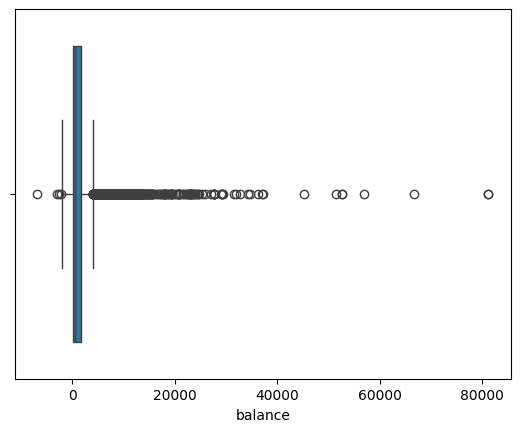

Нижняя граница: -2241.0
Верхняя граница: 4063.0
Всего значений признака: 11162
Число выбросов по методу Тьюки: 1057
Число значений после применения метода Тьюки: 10105


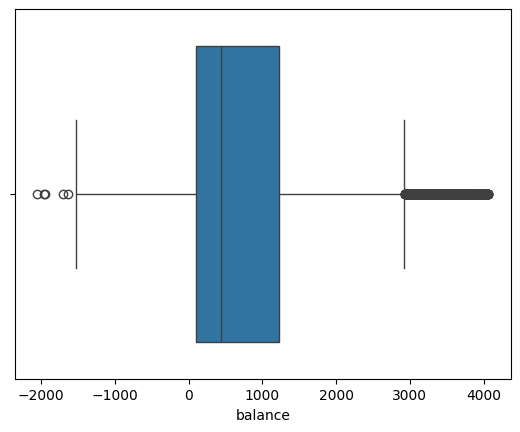

In [1879]:
# удалите все выбросы для признака balance
# ваш код

# До чистки
plt.figure()
sns.boxplot(data=df, x='balance')
plt.show()

# Чистка
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    
    """Функция для очистки дата-фрейма от выбросов по методу межквартильного размаха (метода Тьюки).

    Args:
        data (DataFrame): дата-фрейм с данными.
        feature (pd.Series): признак (столбец) из дата-фрейма. 
        log_scale (bool, optional): Логарифмирование в процессе работы функции. Defaults to False.
        left (float, optional): левый интервал, за пределами которого значения считаются выбросами. Defaults to 1.5.
        right (float, optional): правый интервал, за пределами которого значения считаются выбросами. Defaults to 1.5.

    Returns:
        outliners (DataFrame): дата-фрейм со строками, которые функция посчитала выбросами.
        cleaned (DataFtame): очищенный от выбросов дата-фрейм. 
    """    
    
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    print('Нижняя граница:', lower_bound)
    upper_bound = quartile_3 + (iqr * right)
    print('Верхняя граница:', upper_bound)
    outliners = data[(x < lower_bound)|(x > upper_bound)]
    cleaned = data[(x >= lower_bound)&(x <= upper_bound)]
    return outliners, cleaned


outliners, cleaned = outliers_iqr_mod(df, 'balance', left=1.5, right=1.5)
print('Всего значений признака:', df['balance'].shape[0])
df = cleaned
print(f'Число выбросов по методу Тьюки: {outliners.shape[0]}')
print(f'Число значений после применения метода Тьюки: {cleaned.shape[0]}')

#После чистки

plt.figure()
sns.boxplot(data=df, x='balance')
plt.show()

## Часть 2:  Разведывательный анализ

### Задание 1

In [1880]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код

fig1 = px.pie(df, names = 'deposit')
fig1.show()

#Отношение в числах
print('Клиентов, открывших депозит:', df['deposit'].value_counts()[1])

Клиентов, открывших депозит: 4681


### Задания 2 и 3

In [1881]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

fig2 = px.histogram(df, x='age')
fig2.show()

#Задание 3.2
print('Максимальный возраст клиента:', df['age'].max())

fig3 = px.box(df, x='duration')
fig3.show()

#Задание 3.3
print('Минимальная продолжительность разговора с клиентом:', df['duration'].min())

Максимальный возраст клиента: 95


Минимальная продолжительность разговора с клиентом: 2


По возрасту ничего необычного. Да, есть люди, которым за 90, но их единицы. Такое допускается. Нет клиентов, которым за 100 лет, а также кому меньше 18. Распределение близко к нормальному, если отбросить всех, кому больше 65 лет. Основная аудитория банка - люди от 25 до 60 лет, то есть явно работающие. Сильный рост начинается в районе 23-24 лет, когда большинство заканчивают институты, и основной спад - в районе 60 лет, скорее всего связан с выходом человека на пенсию. Для большей информативности не помешало бы узнать год исследования.

По разговору - почти четыре тысячи секунд - это более часа разговора. Я бы ограничился получасом, остальное считал бы как выброс. Но пока с этим повременю. В остальном - ничего необычного. Распределение ненормальное.

### Задания 4 и 5

In [1882]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

fig4 = px.pie(df, names='month')
fig4.show()

print('Месяцев, в которых проводилась маркетинговая компания:', df['month'].value_counts().count())

fig5 = px.pie(df, names='job')
fig5.show()

print('Сфер представлено среди клиентов банка:', df['job'].value_counts().count())

Месяцев, в которых проводилась маркетинговая компания: 12


Сфер представлено среди клиентов банка: 11


Получается, маркенговая компания велась круглый год. Сколько лет она длилась - неизвестно, а жаль. Но, судя по тому, что в начале дата-фрейма и лидирующий месяц - май, именно с него она началась. Тогда видим, что лидирующие месяцы - это начало компании, но ближе к концу года интерес пропал. И потом снова появился ближе к лету. Возможно также, что имеется связь с сезонностью и периодом отпусков и праздников.

По распределению сфер - сильно лидирует рабочий класс, рабочие люди. Хотя информации, как по мне, недостаточно. Хотелось бы больше классов. Студентов, самозанятых, домохозяек и других людей, которые немного зарабатывают, если вообще зарабатывают, немного, в сумме около 15% на всех. И 6.5% потенциальных пенсионеров.

### Задание 6

In [1883]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
# Группируем значения для визуализации
filtered_data_poutcome = df.groupby(
    by=['deposit', 'poutcome'],
    as_index=False
)['deposit'].value_counts()

# Визуализация
fig6 = px.bar(
    data_frame=filtered_data_poutcome,
    x='count',
    y='poutcome',
    color = 'deposit',
    barmode='group',
    title='Зависимость результатов текущей маркетинговой кампании и предыдущей',
    labels={
        'poutcome': 'Статус предыдущей компании',
        'deposit': 'Успех на текущей компании',
        'count': 'Количество',
        }
)
fig6.show()

Наглядно видим, что люди, которые пользовались услугами банка в период предыдущей компании в большинстве своём продолжают охотно открывать депозиты.

При этом те, кто, по всей видимости, не застал предыдущую компанию, отказываются от услуги. Судя по количеству тех, кто отказался в прошлый раз, но в этот раз воспользовался услугой, в следующий раз распределение этих новых клиентов будет более ровным, т.е. депозитов откроется больше у этой категории.

### Задание 7

In [1884]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

# Группируем значения для визуализации
filtered_data_deposit_month = df.groupby(
    by=['deposit', 'month'],
    as_index=False
)['deposit'].value_counts()

# Визуализация
fig7 = px.bar(
    data_frame=filtered_data_deposit_month,
    x='count',
    y='month',
    color = 'deposit',
    barmode='group',
    title='Зависимость результатов маркетинговой кампании от месяца',
    labels={
        'month': 'Месяц',
        'deposit': 'Успех на текущей компании',
        'count': 'Количество',
        }
)
fig7.update_layout(height=800)
fig7.show()

Самые успешные периоды для маркетинговой компании - ранняя весна и ранняя осень. Самый провальный - май месяц. Странно видеть такой резкий спад после апреля и марта. Возможно это связано с навязчивой рекламой от банка, так как было предположение, что она началась именно в мае. Также наблюдаются подъёмы в предпраздничные или праздничные месяцы, если праздники не начинаются с начала месяца (декабрь, февраль, март). Это может быть связано с сезоном подарков. В сезоны отпусков люди к открытию депозитов относятся прохладно. 

### Задание 8

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

age_untill_30 = df[df['age'] < 30]
age_30_40 = df[(df['age'] >= 30) & (df['age'] < 40)]
age_40_50 = df[(df['age'] >= 40) & (df['age'] < 50)]
age_50_60 = df[(df['age'] >= 50) & (df['age'] < 60)]
age_60_and_above = df[df['age'] >= 60]

10

### Задания 9 и 10

In [1886]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

In [1887]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

In [1888]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

### Задание 11

In [1889]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

## Часть 3: преобразование данных

### Задание 1

In [1890]:
# преобразуйте уровни образования

### Задания 2 и 3

In [1891]:
# преобразуйте бинарные переменные в представление из нулей и единиц

### Задание 4

In [1892]:
# создайте дамми-переменные

### Задания 5 и 6

In [1893]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

### Задания 7 и 8

In [1894]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [1895]:
# рассчитайте необходимые показатели

### Задание 9

In [1896]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

### Задание 10

In [1897]:
# нормализуйте данные с помощью minmaxsxaler

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [1898]:
# обучите логистическую регрессию и рассчитайте метрики качества

### Задания 2,3,4

In [1899]:
# обучите решающие деревья, настройте максимальную глубину

### Задание 5

In [1900]:
# подберите оптимальные параметры с помощью gridsearch

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [1901]:
# обучите на ваших данных случайный лес

### Задания 2 и 3

In [1902]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

### Задание 4

In [1903]:
# объедините уже известные вам алгоритмы с помощью стекинга 

### Задание 5

In [1904]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [1905]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna